In [ ]:
import numpy as np
import scipy.special

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(3.200000000000003, 0.5, 'Ohms')

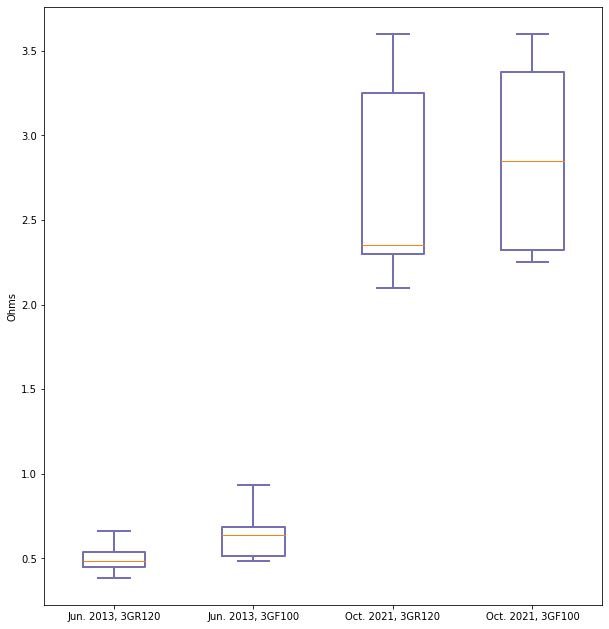

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
list1 = [0.56,0.65,0.64,0.66,0.59,0.51,0.49,0.47,0.56,0.48,0.45,0.45,0.485,0.45,0.49,0.49,0.495,0.405,0.415,0.475,0.4,0.39,0.385]
list2 = [0.65,0.69,0.7,0.71,0.64,0.67,0.72,0.93,0.64,0.63,0.64,0.75,0.515,0.53,0.55,0.63,0.501,0.502,0.506,0.52,0.515,0.485,0.49,0.68]
list3 = [3.2,3.3,3.6,2.25,2.35,2.1,2.35]
list4 = [3.3,3.6,3.4,2.25,2.4,2.3]
data_to_plot = [list1, list2, list3, list4]
fig = plt.figure(1, figsize=(10, 11))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)
fig.savefig('fig1.png', bbox_inches='tight')
for box in bp['boxes']: box.set( color='#7570b3', linewidth=2)
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
labels = ['Jun. 2013, 3GR120','Jun. 2013, 3GF100','Oct. 2021, 3GR120','Oct. 2021, 3GF100']
ax.set_xticklabels(labels)
ax.set_ylabel("Ohms")


## Piezoelectric Wood Calculations

We would like to estimate the voltage produced for a given stress or strain on the soundboard of a guitar.  To do this, we need to know a few things:
 * Typical displacement (strain) or stress associated with acoustic waves on the soundboard surface
 * piezoelectric constant (relating stress or strain to electric field) for the wood in question
  * [Reference / Calculation of Piezoelectric Moduli, pg. 43] provides p = 0.3e-8  and equations for calculating the piezoelectric moduli
  * $d_{ik} = V C S_{compression}/S_{electrode}$
 
 This section assumes a parallel plate capacitor (rectangular electrodes on either side of a slab of wood).

Let's do a calculation for a parallel plate capacitor the same size as the IDE transducer

In [ ]:
eps0 = 8.854e-12 # permittivity of free space, F/m

# Parallel Plate Transducer
Most works use a parallel plate transducer, in which a rectangular slab of wood is "sandwiched" between rectangular electrodes

In [ ]:
#measured thickness of soundboard to be .136 inch using dial caliper 
#parallel plate on quarter inch wood =3.9 something pF
#parallel plate on guitar = 4.7 pF
#idt on guitar = 4.3 pF

# assuming a parallel plate capacitor the same size as the IDT
# small IDT is 8 cm x 4.5 cm rectangle
Se = 0.08 * .045  # m x m = m^2
# C = capacitance for parallel plate capacitor = epsilon0 * epsilon_r * Area / separation
#d = separation of electrodes, thickness of soundboard
d = 0.0034544 # 2 mm in m
# epsR = relative dielectric constant of wood (https://www.fpl.fs.fed.us/documnts/fplrp/fplrp245.pdf)
# epsR seems to be between 4 and 10 for different relative humidities at about 20 °C
epsR = 4.5
eps0 = 8.854e-12
C = eps0 * epsR * Se / d
print("Capacitance of parallel plate transducer same size as IDT transducer: {} pF".format(C/1e-12))

Capacitance of parallel plate transducer same size as IDT transducer: 41.522348309402496 pF


In [ ]:
Se = 0.00064516  # m x m = m^2
# C = capacitance for parallel plate capacitor = epsilon0 * epsilon_r * Area / separation
#d = separation of electrodes, thickness of soundboard
d = 0.0034544 # 2 mm in m
# epsR = relative dielectric constant of wood (https://www.fpl.fs.fed.us/documnts/fplrp/fplrp245.pdf)
# epsR seems to be between 4 and 10 for different relative humidities at about 20 °C
epsR = 3
eps0 = 8.854e-12
Cguitar = eps0 * epsR * Se / d
print("Capacitance of parallel plate transducer transducer on guitar: {} pF".format(Cguitar/1e-12))

Capacitance of parallel plate transducer transducer on guitar: 4.960844117647058 pF


In [ ]:
Se = 0.00064516 # m^2, the area was 1 in^2
# C = capacitance for parallel plate capacitor = epsilon0 * epsilon_r * Area / separation
#d = separation of electrodes, thickness of soundboard
d = 0.00635 # .25 in m
# epsR = relative dielectric constant of wood (https://www.fpl.fs.fed.us/documnts/fplrp/fplrp245.pdf)
# epsR seems to be between 4 and 10 for different relative humidities at about 20 °C
epsR = 4.5
eps0 = 8.854e-12
Creal = eps0 * epsR * Se / d
print("Capacitance of parallel plate transducer (actual measurement): {} pF".format(Creal/1e-12))

Capacitance of parallel plate transducer (actual measurement): 4.0480488 pF


In [ ]:
# Se is electric surface area
# Scomp is area of compression
# Sm = 
# Q = C*V; charge = capacitance * potential (voltage)
d_ik = V * C * Se / (1635e5 * S * P) # V electric potential * C capacitance * Se electrode surface area / (Sm mechanical compression area in m^2, P load in kg)
d_ik = 3e-9 # units TBD; is this .03 or 0.3?

from the foregoing, we can get Voltage measured in terms of other parameters:

In [ ]:
Se = 15.1 # cm^2 1 in^2
Scomp = 15.1 # cm^2
C = 4.3
Sel = Scomp # make electrode area equal to compression area (arbitrary)
Sm = Sel # make mechanical area = electrical area (ideal parallel plate capacitor)
P = .05 # kg (pressure or Force?  need per unit area? check units)
d_ik = 3e-9 #coulombs something... multiple sources 
#charge = capacitance * voltage 
V = (1635e5*d_ik * Sm * P) / (C * Se)

In [ ]:
print(V)
print(C)

0.0057034883720930235
4.3


So, the voltage measured will increase with piezoelectric coefficient, $d_{ik}$, and electrode surface area, $S_{el}$. It will decrease with increasing capacitance, $C$, and with increasing surface area of mechanical compression, $S_{comp}$.

# Interdigitated Transducer

Here is the calculation for capacitance (from Eq. (4) and (5) of https://www.ndt.net/article/ultragarsas/Vol.65-No.2-2010_04-Janeliauskas.pdf):


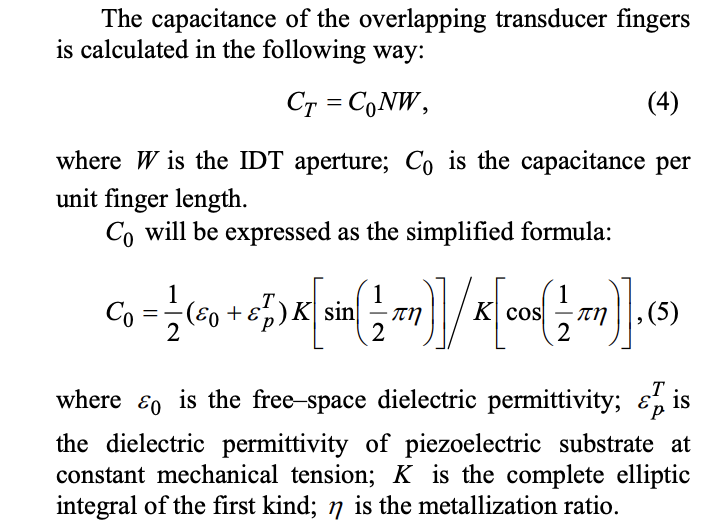

In [ ]:
# C0 is capacitance per finger length
# eta is metallization ratio, fraction of metal width vs. gap width
eta = 0.5 # electrode fingers are same width as gaps (50% metallization ratio)
# epsilon effective, epsEff is somewhere between air and wood, and, if a plastic layer is included, it includes that as well.
epsEff = 3.5 
# Lf is finger length
Lf = 0.08 # meters
# Nf is number of fingers
Nf = 5
# instead of K, complete elliptic integral of first kind, use scipy.special.ellipk
C0 = 0.5 * (eps0 + epsEff) * scipy.special.ellipk(np.sin(0.5*np.pi * eta)) / scipy.special.ellipk(np.cos(0.5*np.pi*eta))
C = C0 * Lf * Nf
print("Capacitance of IDT transducer: {} pF".format(C/1e-12))
# NB: this is much too high; the elliptic integral isn't correct or the one expected by the reference

Capacitance of IDT transducer: 700000000001.7708 pF


In [ ]:
# Here is another calculation, but I disagree with the formula:
# https://aip.scitation.org/doi/pdf/10.1063/1.5002470
# I disagree because the thickness of the electrodes is small relative to the gap between them; the parallel plate formula does not apply here.

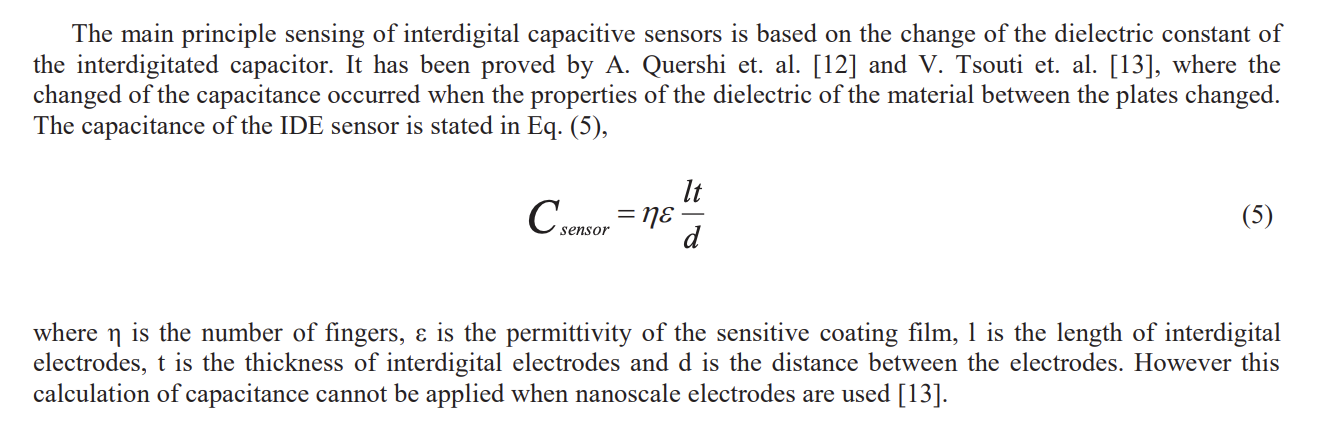

In [ ]:
thickness = 0.1e-3 # electrode thickness, meters
width = 0.01 # electrode width, meters
C = Nf * eps0 * epsEff * Lf * thickness / width
print("Another calculation of capacitance of IDT transducer: {} pF".format(C/1e-12))

Another calculation of capacitance of IDT transducer: 0.123956 pF


Looking at Hashimoto's book "Surface Acoustic Wave Devices in Telecommunications"
Equation (3.4) shows 
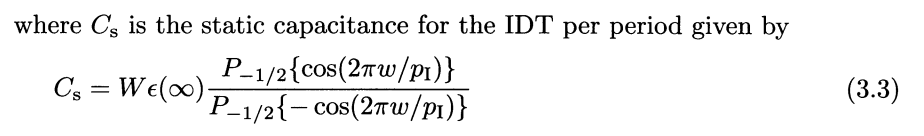

In [ ]:
w = 0.005 # m, width of a single finger (electrode width)
p = 0.025 # m, electrode period
# eta is metallization ratio, fraction of metal width vs. gap width
eta = w/p # electrode fingers are same width as gaps (50% metallization ratio)
eps0 = 8.854e-12 # F/m, dielectric permittivity of free space
# epsilon effective, epsEff is somewhere between air and wood, and, if a plastic layer is included, it includes that as well.
epsREff = 3.5 
epsInf = eps0 * epsREff # approximation (not using tensor quantities from Hashimoto)
# Lf is finger length
Lf = 0.08 # meters
W = Lf # width of IDT aperture (length of finger) 
# Nf is number of periods
Np = 2
# P is the Legendre (-1/2) function
from scipy.special import eval_legendre
Cs = W * epsInf * eval_legendre(-1/2, np.cos(2*np.pi*eta))/eval_legendre(-1/2, -np.cos(2*np.pi*eta))
CIDT = Cs * Np
print("CIDT = {:.2f} pF".format(CIDT/1e-12))

CIDT = 4.29 pF


# Other stuff

In [ ]:
# This is a comment line in a code block

# The following lines import things we will need
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# This next block will do some other things we could put in the block above, 
#   we can keep it logically separate this way. Press shift+ENTER to execute a 
#   code block.

Text(0, 0.5, 'Displacement (u$_x$), m')

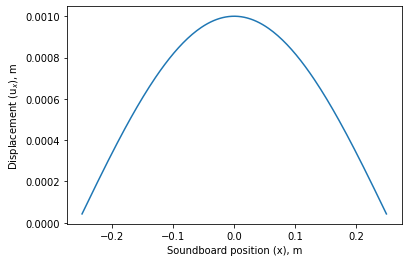

In [ ]:
W = 0.5 # meters, total width of the sound board
Nx = 200
x = np.linspace(-W/2,W/2,Nx) # get an array of points across the sound board
#using data from []:
f0 = 214 # Hz (Ambridge121 from Richardson2010) # NB: 440 Hz is the "A" above "middle C"
vp = 220 # m/s, acoustic phase velocity (350 m/s is speed in air)
Beta0 = 2 * np.pi * f0 / vp
A0 = 0.001 # displacement in meters (mm at most)
ux = A0 * np.cos(Beta0 * x)

plt.plot(x,ux)
plt.xlabel('Soundboard position (x), m')
plt.ylabel('Displacement (u$_x$), m')

Text(0, 0.5, 'Strain Energy Density, J/m$^3$')

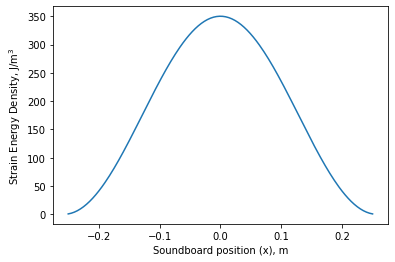

In [ ]:
# Strain energy (stored energy) is proportional to the square of the displacement
# Number of peaks in energy should be equal to number of green fringes
#   in the laser vibrometer image
c = 700e6 # N/m^2, Pascal; stiffness or modulus of the wood
# estimated 700e6 Pa from https://wfs.swst.org/index.php/wfs/article/download/648/648
sx = 0.5 * c * ux ** 2
plt.plot(x,sx)
plt.xlabel('Soundboard position (x), m')
plt.ylabel('Strain Energy Density, J/m$^3$')

Text(0, 0.5, 'Strain Energy Density, J/m$^3$')

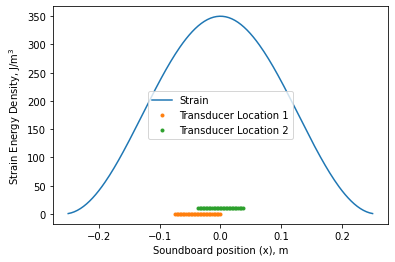

In [ ]:
# define a transducer width
WT = 3*.0254 # 3 inches in meters; width of transducer
left_indices = (x>-WT) & (x<0)
plt.plot(x,sx,label='Strain')
plt.plot(x[left_indices],np.zeros(np.shape(x[left_indices])),'.',label='Transducer Location 1')
middle_indices = (x>-WT/2) & (x<WT/2)
plt.plot(x[middle_indices],10*np.ones(np.shape(x[middle_indices])),'.',label='Transducer Location 2') # 10 just shifts it up to see them separately
plt.legend() # add a legend
plt.xlabel('Soundboard position (x), m')
plt.ylabel('Strain Energy Density, J/m$^3$')

In [ ]:
# Integrate the strain energy over a distance to the left
Eleft = np.trapz(sx[left_indices],x[left_indices])
print(Eleft)

# Integrate the strain energy over the central region

Emid = np.trapz(sx[middle_indices],x[middle_indices])
print(Emid)

# Integrate the strain energy over all sound board
Eall = np.trapz(sx,x)
print(Eall)

23.798462117046583
25.084226131969228
89.9500779325299


[[ 3.00000000e+04+0.00000000e+00j  1.00205863e+00+4.62630618e-04j
  -1.02516723e+00-1.56079754e-01j ...  1.00291610e+00-2.56012281e-04j
   1.00306213e+00-6.83932274e-04j  1.00310779e+00-4.56595997e-04j]
 [ 5.29850000e+05+0.00000000e+00j  1.00237381e+00+2.65279645e-03j
  -9.88194346e-01-6.23749662e-03j ...  1.00345182e+00-1.41565055e-02j
   1.00354886e+00-1.39647545e-02j  1.00366116e+00-1.41412672e-02j]
 [ 1.02970000e+06+0.00000000e+00j  1.00379229e+00+4.76443442e-03j
  -9.87739265e-01-3.73357092e-03j ...  1.00521135e+00-2.79860925e-02j
   1.00530255e+00-2.77968217e-02j  1.00534868e+00-2.80238781e-02j]
 ...
 [ 9.90003000e+07+0.00000000e+00j  9.85892951e-01-3.65416668e-02j
  -9.87807274e-01+4.90123332e-02j ... -8.12947392e-01+3.13867003e-01j
  -8.72944534e-01+2.71933645e-01j -8.29809368e-01+2.72169620e-01j]
 [ 9.95001500e+07+0.00000000e+00j  9.85882223e-01-3.58956754e-02j
  -9.89218712e-01+4.89321053e-02j ... -8.06263924e-01+3.09497148e-01j
  -8.69540393e-01+2.78977752e-01j -8.36894095e-

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-10000.0, 0.0)

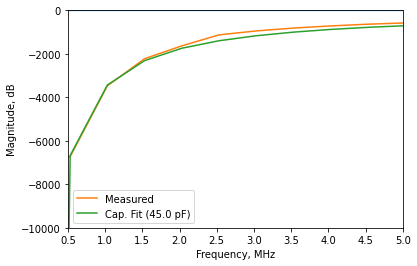

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
data = np.loadtxt("collected_data.txt", delimiter = ",", dtype = np.cdouble)
print(data)
frequency = data[:,0]
print(frequency[0])
print(frequency.shape)

print(data.shape)

columnFive = data[:,5]
columnSix = data[:,6]
columnFour = data[:,4]
plt.plot(frequency/1e6, 10*np.log10(abs(columnFive)**2))
plt.xlabel('Frequency, MHz')
plt.ylabel('Magnitude, dB')
#Measure of the energy of signal going in vs going out aka reflection coefficient
#Reflection coefficient is a title
#could talk about how the cable itself has some capacitance
# columnSix is data for transducer on Styrofoam
# columnFive is data for transducer on Rexolite
#column6 is a reflection coefficient .... we made it into an impedance from the formula
#reactance is negative therefore a capacitor
#shape of the slope 1/( j * 2 * pi * frequency * capacitance)... ends up being j * - something
impedance6 = (1+columnSix)/(1-columnSix) * 50
# plt.plot(frequency/1e6, 50*np.imag(1+columnSix)/(1-columnSix)))
reactance6 = np.imag(impedance6)
Capacitance_fit = 0.045e-9 # about 45 picoFerods
impedance_fit = 1/(1j*2*np.pi*frequency*Capacitance_fit)
reactance_fit = np.imag(impedance_fit)
plt.plot(frequency/1e6,reactance6,label='Measured')
plt.plot(frequency/1e6,reactance_fit,label='Cap. Fit ({} pF)'.format(Capacitance_fit/1e-12))
plt.legend()
plt.xlim([0.5,5])
plt.ylim([-10000,0])
#plt.title('Reactance of Transducer on Short Cable')



The 45 pF capacitance extracted from the reflection coefficient measurement includes the cable capacitance, because the cable was attached.  The network analyzer calibration set the "reference plane" at the end of the test cable, but not including the short cable attached to the transducer.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Magnitude, dB')

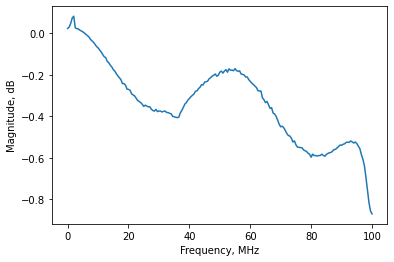

In [ ]:
plt.plot(frequency/1e6,10*np.log10(abs(columnFour)**2))
plt.xlabel('Frequency, MHz')
plt.ylabel('Magnitude, dB')
#plt.title('Reflected Power for IDT on Styrofoam')
#for styrofoam

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Magnitude, dB')

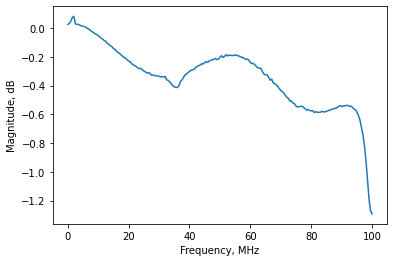

In [ ]:
plt.plot(frequency/1e6,10*np.log10(abs(columnFive)**2))
plt.xlabel('Frequency, MHz')
plt.ylabel('Magnitude, dB')
#plt.title('Reflected Power for IDT on Rexolite')

#for rexolite

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


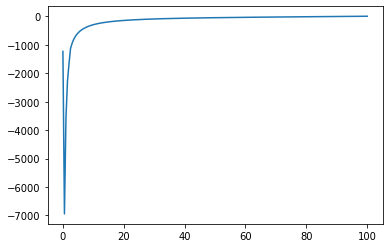

In [ ]:
Z4 = 50 * (1+columnFour)/(1-columnFour)
X4 = np.imag(Z4)
plt.plot(frequency/1e6,X4)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Capacitive Reactance of IDT on Styrofoam')

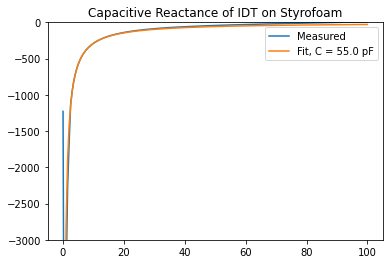

In [ ]:
C4 = 55e-12 # Farads... 55e-12 is 55 pF
Xc4 = np.imag(1/(1j*2*np.pi*frequency*C4))
plt.plot(frequency/1e6,X4,label='Measured')
plt.plot(frequency/1e6,Xc4,label='Fit, C = {} pF'.format(C4/1e-12))
plt.ylim([-3000,0])
plt.legend()
plt.title('Capacitive Reactance of IDT on Styrofoam')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Capacitive Reactance of IDT on Rexolite')

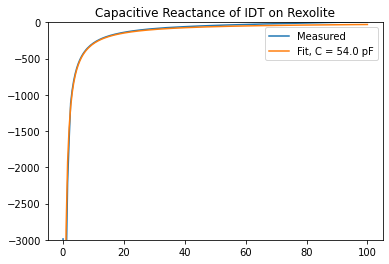

In [ ]:
Z5 = 50 * (1+columnFive)/(1-columnFive)
X5 = np.imag(Z5)
C5 = 52e-12 # Farads... 55e-12 is 55 pF
Xc5 = np.imag(1/(1j*2*np.pi*frequency*C5))
plt.plot(frequency/1e6,X5,label='Measured')
plt.plot(frequency/1e6,Xc5,label='Fit, C = {} pF'.format(C5/1e-12))
plt.ylim([-3000,0])
plt.legend()
plt.title('Capacitive Reactance of IDT on Rexolite')

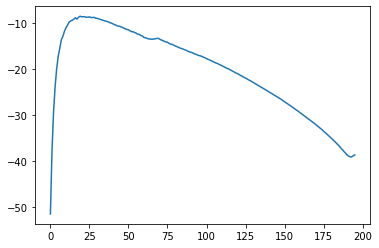

In [ ]:
plt.plot(Xc5[5:]-X5[5:])

In [ ]:
Crange = np.linspace(40e-12,60e-12,100)
F = np.zeros((len(Crange)))
for C in Crange:


In [ ]:
from google.colab import files
uploaded = files.upload()